### Implementing Decesion Tree Classification on Credit Risk Data Set

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading data from input csv file
credit_data = pd.read_csv("credit_risk.csv")
# Uncomment the following line to view the sample data
# credit_data.head()


In [2]:
# Understanding the various attributes
credit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

#### Setting the predictors and target:
Consider all the attributes except for the target column, "class" as potential predictors for building the tree.

In [3]:
# Selecting the predictor attributes
X = credit_data.columns.drop("class")
# Selecting  the target
y = credit_data['class']


#### Encoding the categorical values:
Encode the categorical data so that it can be used to build a model using sklearn.

In [4]:
# Encoding all the predictor variables to convert the categorical values to numerical values.
credit_data_encoded = pd.get_dummies(credit_data[X])
print("Total number of predictors after encoding = ", len(credit_data_encoded.columns))
# Printing the list of columns after encoding to understand the encoding process
credit_data_encoded.columns


Total number of predictors after encoding =  61


Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

#### Splitting the data into train and test sets:
Now let us split the data into train and test dataset in the ratio 85:15.

In [5]:
# Import the required function
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100) 
# Printing the shape of the resulting datasets
print("Shape of X_train and y_train are:", X_train.shape, "and", y_train.shape, " respectively")
print("Shape of X_test and y_test are:", X_test.shape, "and", y_test.shape, " respectively")


Shape of X_train and y_train are: (850, 61) and (850,)  respectively
Shape of X_test and y_test are: (150, 61) and (150,)  respectively


#### Building the model using Scikit-Learn:
Now let us build the decision tree model using sklearn.tree.DecisionTreeClassifier.

In [6]:
# Importing required class 
from sklearn.tree import DecisionTreeClassifier
# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)
# Training model on the training data
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

#### Prediction

In [7]:
# Predicting target values using the model built on training data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


#### Visualizing the decision tree:
You can visualize the inducted decision tree using the export_graphviz() function of the sklearn.tree as shown below.

In [8]:
# Importing the required libraries (Ensure that they are already installed.)
from sklearn.tree import export_graphviz
import graphviz
# Generating the tree
dot_data = export_graphviz(model, out_file=None,
                          feature_names=credit_data_encoded.columns,  
                          class_names=model.classes_,  
                          ) 
graph = graphviz.Source(dot_data) 
graph


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [11]:
#Demonstration Example

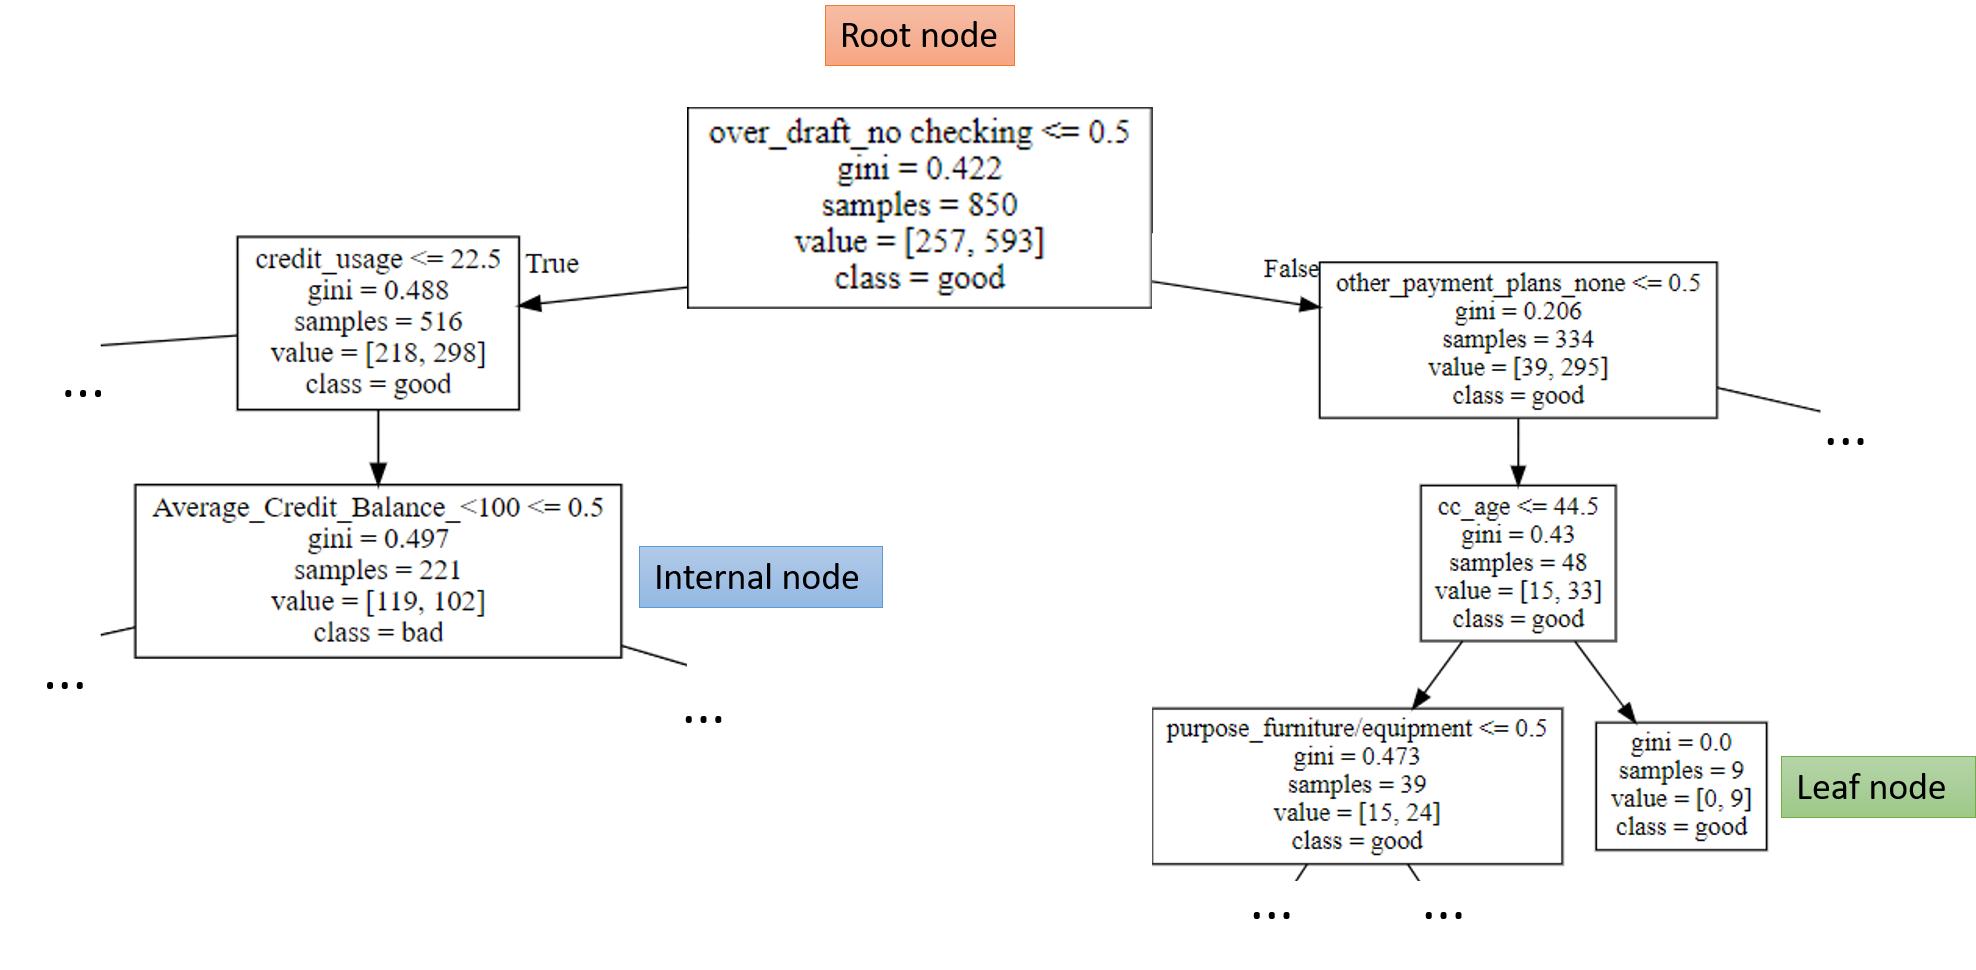# 

#### Evaluating Performance of a model
Let us now evaluate the performance of the tree on train and test data.

In [12]:
# Getting the accuracy on train data
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)


Accuracy of the model on train data =  1.0
Accuracy of the model on test data =  0.6533333333333333


#### Observation
You can observe that the training accuracy is 100% and the test accuracy is approximately 67%.
This could mean that the model is overfit to the training data and is not a good approximation of the input to output mapping.
In order to avoid this problem, certain hyperparameters of the decision tree algorithmcan be tuned.
Hyperparameters are model properties which guide the training process i.e. they cannot be learnt from the training data.
For example, the below code demonstrates creating two models with different values for the following hyper-parameters:
min_samples_split: The minimum number of instances that should be at a node before the algorithm does a further split on it.
min_impurity_decrease: The minimum percentage reduction in the impurity of a set (as measured by gini index) required to make a split.

In [13]:
# Model 1:
# Min number of samples required in a set to split = 10
# Min reduction in impurity required for split to be included in the tree = 0.005
model1 = DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
# Fitting the model to the training data
model1.fit(X_train,y_train)
# Measuring the accuracy of the model
print("train_accuracy = ", model1.score(X_train,y_train))
print("test_accuracy = ", model1.score(X_test,y_test))


train_accuracy =  0.7635294117647059
test_accuracy =  0.7266666666666667


In [14]:
# Model 2:
# Min number of samples required in a set to split = 20
# Min reduction in impurity required for split to be included in the tree = 0.1
model2 = DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)
# Fitting the model to the training data
model2.fit(X_train,y_train)
# Measuring the accuracy of the model
print("Model2 train accuracy = ", model2.score(X_train,y_train))
print("Model2 test accuracy = ", model2.score(X_test,y_test))


Model2 train accuracy =  0.6976470588235294
Model2 test accuracy =  0.7133333333333334
